In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\ADMIN\Downloads\respiratory dataset 4.csv")
data.head()

,Symptoms,Age,Sex,Disease,Treatment,Nature
0,coughing,5.0,female,Asthma,Omalizumab,high
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,high
2,wheezing,6.0,male,Asthma,Mepolizumab,high
3,shortness of breath,7.0,male,Asthma,Mepolizumab,high
4,shortness of breath,9.0,male,Asthma,Mepolizumab,high


In [3]:
data.shape

(25247, 6)

In [4]:
data.columns

Index(['Symptoms', 'Age', 'Sex', 'Disease', 'Treatment', 'Nature'], dtype='object')

In [5]:
data.isnull().sum()

Symptoms      314
Age           208
Sex           577
Disease       220
Treatment    1773
Nature          0
dtype: int64

In [6]:
data.Symptoms.value_counts()
data.Symptoms=data.Symptoms.fillna("Persistent dry cough")

In [7]:
data.Age=data.Age.fillna(data.Age.median())

In [8]:
data.Sex.value_counts()
data.Sex=data.Sex.fillna("not to say")

In [9]:
data.Disease.value_counts()
data.Disease=data.Disease.fillna("Aspergillosis")

In [10]:
data.Treatment.value_counts()
data.Treatment=data.Treatment.fillna("Antibiotics")

In [11]:
data.isnull().sum()

Symptoms     0
Age          0
Sex          0
Disease      0
Treatment    0
Nature       0
dtype: int64

In [12]:
data=data.dropna()
data.shape

(25247, 6)

In [13]:
data.Nature.value_counts()

high      15715
medium     9276
low         256
Name: Nature, dtype: int64

In [14]:
data.Nature.replace({"low":"medium"},inplace=True)
data.Nature.value_counts()

high      15715
medium     9532
Name: Nature, dtype: int64

In [15]:
data.dtypes

Symptoms      object
Age          float64
Sex           object
Disease       object
Treatment     object
Nature        object
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Symptoms=le.fit_transform(data.Symptoms)
data.Sex=le.fit_transform(data.Sex)
data.Disease=le.fit_transform(data.Disease)
data.Treatment=le.fit_transform(data.Treatment)
data.Nature=le.fit_transform(data.Nature)

In [17]:
data.dtypes

Symptoms       int32
Age          float64
Sex            int32
Disease        int32
Treatment      int32
Nature         int32
dtype: object

# Model Building

In [18]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [19]:
x.head(1)
#y.head(1)

,Symptoms,Age,Sex,Disease,Treatment
0,1,5.0,0,3,10


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=100)

In [22]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((20197, 5), (5050, 5), (20197,), (5050,))

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [24]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [25]:
lg_p=lg.predict(x_te)
lg_p

array([1, 0, 0, ..., 0, 1, 0])

In [26]:
pred_prob=lg.predict_proba(x_te)
pred_prob

array([[0.40680382, 0.59319618],
       [0.86877276, 0.13122724],
       [0.56662529, 0.43337471],
       ...,
       [0.85757147, 0.14242853],
       [0.44854917, 0.55145083],
       [0.60490474, 0.39509526]])

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
lg_m=confusion_matrix(lg_p,y_te)
lg_m

array([[2752, 1089],
       [ 408,  801]], dtype=int64)

In [29]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

70.35643564356435

In [30]:
tpr=2752/(2752+408)
tpr

0.8708860759493671

In [31]:
fpr = 1089/(1089+801)
fpr

0.5761904761904761

In [32]:
recall=2752/(2752+408)
recall

0.8708860759493671

In [33]:
precision = 2752/(2752+1089)
precision

0.7164800833116376

In [34]:
f1_score=(2*(precision*recall))/(precision+recall)
f1_score

0.7861734037994572

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      3841
           1       0.42      0.66      0.52      1209

    accuracy                           0.70      5050
   macro avg       0.65      0.69      0.65      5050
weighted avg       0.76      0.70      0.72      5050



In [37]:
#AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [38]:
roc=roc_auc_score(lg_p,y_te)
roc

0.6895055503406823

In [39]:
df=pd.DataFrame(pred_prob)
#df

In [40]:
fpr0,tpr0,thrshold=roc_curve(y_te,df.iloc[:,1])

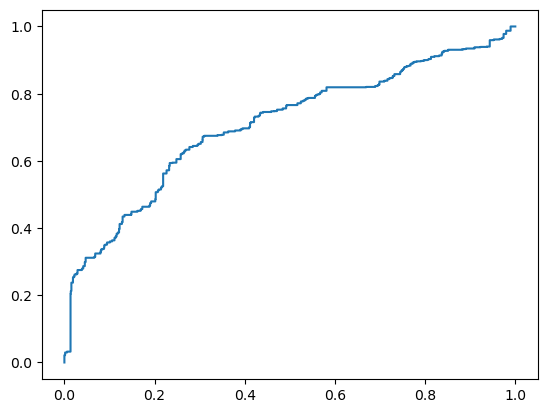

In [41]:
plt.plot(fpr0,tpr0)

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [43]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [44]:
dt_p=dt.predict(x_te)
dt_p

array([1, 0, 0, ..., 1, 1, 0])

In [45]:
dt_m=confusion_matrix(dt_p,y_te)
dt_m

array([[3145,   12],
       [  15, 1878]], dtype=int64)

In [46]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

99.46534653465346

In [47]:
tpr1=3145/(3145+15)
tpr1

0.995253164556962

In [48]:
fpr1=12/(12+1878)
fpr1

0.006349206349206349

In [49]:
recall1=3145/(3145+15)
recall1

0.995253164556962

In [50]:
precision1=3145/(3145+12)
precision1

0.9961989230281914

In [51]:
f1_score1=(2*(precision1*recall1))/(precision1+recall1)
f1_score1

0.9957258192179832

In [52]:
dt.feature_importances_

array([0.20176431, 0.14165578, 0.03313351, 0.28722736, 0.33621904])

In [53]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3157
           1       0.99      0.99      0.99      1893

    accuracy                           0.99      5050
   macro avg       0.99      0.99      0.99      5050
weighted avg       0.99      0.99      0.99      5050



# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [55]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [56]:
rf_p=rf.predict(x_te)
rf_p

array([1, 0, 0, ..., 1, 1, 0])

In [57]:
rf_m=confusion_matrix(rf_p,y_te)
rf_m

array([[3145,   12],
       [  15, 1878]], dtype=int64)

In [58]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

99.46534653465346

In [59]:
tpr2=3145/(3145+15)
tpr2

0.995253164556962

In [60]:
fpr2=12/(12+1878)
fpr2

0.006349206349206349

In [61]:
recall2=3145/(3145+15)
recall2

0.995253164556962

In [62]:
precision2=3145/(3145+12)
precision2

0.9961989230281914

In [63]:
f1_score2=(2*(precision2*recall2))/(precision2+recall2)
f1_score2

0.9957258192179832

In [64]:
print(classification_report (rf_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3157
           1       0.99      0.99      0.99      1893

    accuracy                           0.99      5050
   macro avg       0.99      0.99      0.99      5050
weighted avg       0.99      0.99      0.99      5050



# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [66]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=25)

In [67]:
knn_p=knn.predict(x_te)

In [68]:
knn_m=confusion_matrix(knn_p,y_te)
knn_m

array([[3122,   64],
       [  38, 1826]], dtype=int64)

In [69]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

97.98019801980197

In [70]:
tpr3=3122/(3122+38)
tpr3

0.9879746835443038

In [71]:
fpr3=64/(64+1826)
fpr3

0.033862433862433865

In [72]:
recall3=3122/(3122+38)
recall3

0.9879746835443038

In [73]:
precision3=3122/(3122+64)
precision3

0.9799121155053359

In [74]:
f1_score3=(2*(precision3*recall3))/(precision3+recall3)
f1_score3

0.9839268830759533

In [75]:
print(classification_report(knn_p,y_te))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3186
           1       0.97      0.98      0.97      1864

    accuracy                           0.98      5050
   macro avg       0.98      0.98      0.98      5050
weighted avg       0.98      0.98      0.98      5050



# Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [77]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [78]:
nb_p=nb.predict(x_te)

In [79]:
nb_m=confusion_matrix(nb_p,y_te)
nb_m

array([[2058,  815],
       [1102, 1075]], dtype=int64)

In [80]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

62.039603960396036

In [81]:
tpr4=2058/(2058+1102)
tpr4

0.6512658227848102

In [82]:
fpr4=815/(815+1075)
fpr4

0.4312169312169312

In [83]:
recall4=2058/(2058+1102)
recall4

0.6512658227848102

In [84]:
precision4=2058/(2058+815)
precision4

0.7163243995823181

In [85]:
f1_score4=(2*(precision4*recall4))/(precision4+recall4)
f1_score4

0.6822476379910493

In [86]:
print(classification_report(nb_p,y_te))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      2873
           1       0.57      0.49      0.53      2177

    accuracy                           0.62      5050
   macro avg       0.61      0.61      0.61      5050
weighted avg       0.62      0.62      0.62      5050



# SVM

In [87]:
from sklearn.svm import SVC
svc=SVC()

In [88]:
svc.fit(x_tr,y_tr)

SVC()

In [89]:
svc_p=svc.predict(x_te)

In [90]:
svc_m=confusion_matrix(svc_p,y_te)
svc_m

array([[2908,  799],
       [ 252, 1091]], dtype=int64)

In [91]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

79.1881188118812

In [92]:
tpr5=2908/(2908+252)
tpr5

0.920253164556962

In [93]:
fpr5=799/(799+1091)
fpr5

0.42275132275132277

In [94]:
recall5=2908/(2908+252)
recall5

0.920253164556962

In [95]:
precision5=2908/(2908+799)
precision5

0.7844618289722147

In [96]:
f1_score5=(2*(precision5*recall5))/(precision5+recall5)
f1_score5

0.8469491772244067

In [97]:
print(classification_report(svc_p,y_te))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      3707
           1       0.58      0.81      0.67      1343

    accuracy                           0.79      5050
   macro avg       0.75      0.80      0.76      5050
weighted avg       0.83      0.79      0.80      5050



# AdaBoost

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [99]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [100]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [101]:
adbo_p=adbo.predict(x_te)

In [102]:
adboo_m=confusion_matrix(adbo_p,y_te)
adboo_m

array([[3145,   12],
       [  15, 1878]], dtype=int64)

In [103]:
adbo_acc=adboo_m.diagonal().sum()/adboo_m.sum()*100
adbo_acc

99.46534653465346

In [104]:
tpr6=3145/(3145+15)
tpr6

0.995253164556962

In [105]:
fpr6=12/(12+1878)
fpr6

0.006349206349206349

In [106]:
recall6=3145/(3145+15)
recall6

0.995253164556962

In [107]:
precision6=3145/(3145+12)
precision6

0.9961989230281914

In [108]:
f1_score6=(2*(precision6*recall6))/(precision6+recall6)
f1_score6

0.9957258192179832

In [109]:
print(classification_report(adbo_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3157
           1       0.99      0.99      0.99      1893

    accuracy                           0.99      5050
   macro avg       0.99      0.99      0.99      5050
weighted avg       0.99      0.99      0.99      5050



# xgboost

In [110]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [111]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
xgb_p=xgb.predict(x_te)

In [113]:
xgb_m=confusion_matrix(xgb_p,y_te)
xgb_m

array([[3145,   12],
       [  15, 1878]], dtype=int64)

In [114]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

99.46534653465346

In [115]:
tpr7=3145/(3145+15)
tpr7

0.995253164556962

In [116]:
fpr7=12/(12+1878)
fpr7

0.006349206349206349

In [117]:
recall7=3145/(3145+15)
recall7

0.995253164556962

In [118]:
precision7=3145/(3145+12)
precision7

0.9961989230281914

In [119]:
f1_score7=(2*(precision7*recall7))/(precision7+recall7)
f1_score7

0.9957258192179832

In [120]:
print(classification_report(xgb_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3157
           1       0.99      0.99      0.99      1893

    accuracy                           0.99      5050
   macro avg       0.99      0.99      0.99      5050
weighted avg       0.99      0.99      0.99      5050



In [121]:
l1=["LG","DT","RF","SVM","KNN","NB","AdaBoost","xgboost"]
l2=[lg_acc,dt_acc,rf_acc,svc_acc,knn_acc,nb_acc,adbo_acc,xgb_acc]
l3=[tpr,tpr1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7]
l4=[fpr,fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7]
l5=[f1_score,f1_score1,f1_score2,f1_score3,f1_score4,f1_score5,f1_score6,f1_score7]

In [122]:
d1=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"TPR":l3,"FPR":l4,"f1_score":l5})
d1

,Model_Name,accuracy,TPR,FPR,f1_score
0,LG,70.356436,0.870886,0.576190,0.786173
1,DT,99.465347,0.995253,0.006349,0.995726
2,RF,99.465347,0.995253,0.006349,0.995726
3,SVM,79.188119,0.987975,0.033862,0.983927
4,KNN,97.980198,0.651266,0.431217,0.682248
5,NB,62.039604,0.920253,0.422751,0.846949
6,AdaBoost,99.465347,0.995253,0.006349,0.995726
7,xgboost,99.465347,0.995253,0.006349,0.995726


In [123]:
#PRC 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [124]:
precision_1,recall_1,threshold_1=precision_recall_curve(y_te,rf_p)

<function matplotlib.pyplot.show(close=None, block=None)>

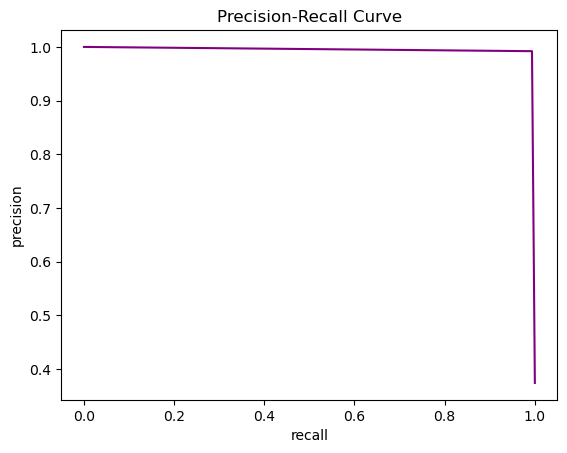

In [328]:
fig,ax=plt.subplots()
ax.plot(recall_1,precision_1,color="purple")
plt.title("Precision-Recall Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show

# Class Imbalance

# Random Undersampling

In [126]:
c_0,c_1=data["Nature"].value_counts()
c_0,c_1

(15715, 9532)

In [127]:
train_0=data[data["Nature"]==0]
train_1=data[data["Nature"]==1]

In [128]:
train_0.shape,train_1.shape

((15715, 6), (9532, 6))

In [129]:
train_0under=train_0.sample(c_1)

In [130]:
train_0under.shape

(9532, 6)

In [131]:
class0_1=pd.concat([train_0under,train_1],axis=0)

In [132]:
class0_1.shape

(19064, 6)

In [133]:
class0_1.Nature.value_counts()

0    9532
1    9532
Name: Nature, dtype: int64

In [134]:
#class0_1.shape
class0_1.head()

,Symptoms,Age,Sex,Disease,Treatment,Nature
21981,43,8.0,0,4,19,0
14973,69,67.0,1,8,4,0
14852,80,76.0,0,6,2,0
6840,46,52.0,1,11,2,0
2855,48,15.0,1,16,12,0


# Outliers

<Axes: >

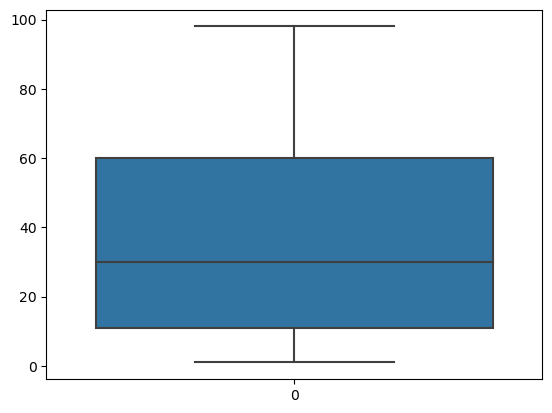

In [135]:
sns.boxplot(class0_1["Age"])

In [136]:
class0_1.skew()

Symptoms    -0.178777
Age          0.487394
Sex          0.219124
Disease     -0.293612
Treatment    0.393314
Nature       0.000000
dtype: float64

# Visualization

<Axes: >

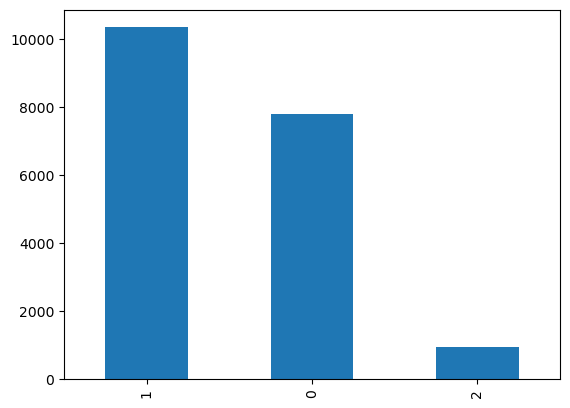

In [137]:
class0_1["Sex"].value_counts().plot.bar()

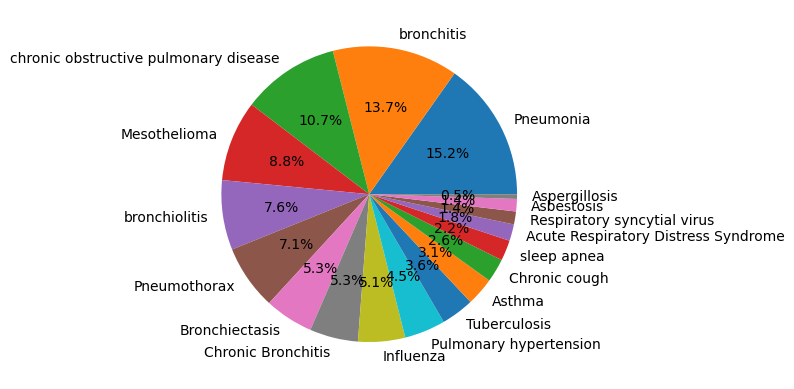

In [138]:
x=np.array([3808,3440,2673,2211,1908,1769,1331,1325,1287,1122,900,771,645,561,455,353,340,128])
lb=["Pneumonia","bronchitis","chronic obstructive pulmonary disease","Mesothelioma","bronchiolitis","Pneumothorax","Bronchiectasis","Chronic Bronchitis","Influenza","Pulmonary hypertension","Tuberculosis","Asthma","Chronic cough","sleep apnea","Acute Respiratory Distress Syndrome","Respiratory syncytial virus","Asbestosis","Aspergillosis"]
plt.pie(x,labels=lb,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

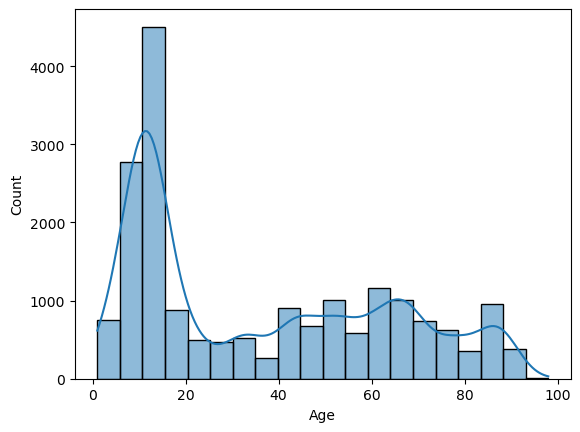

In [139]:
sns.histplot(data=class0_1,x="Age",bins=20,kde=True)

# Model Building

In [140]:
x1=class0_1.iloc[:,:-1]
y1=class0_1.iloc[:,-1]

In [141]:
y1.shape,x1.shape

((19064,), (19064, 5))

In [142]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [143]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((15251, 5), (3813, 5), (15251,), (3813,))

# Logistic Regression

In [144]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [145]:
lg_p1=lg.predict(x1_te)
lg_p1

array([1, 0, 0, ..., 1, 0, 1])

In [146]:
lg_m1=confusion_matrix(lg_p1,y1_te)
lg_m1

array([[1101,  551],
       [ 862, 1299]], dtype=int64)

In [147]:
tpr11=1126/(1126+837)
tpr11

0.5736118186449313

In [148]:
fpr11=561/(561+1289)
fpr11

0.30324324324324325

In [149]:
recall11=1126/(1126+837)
recall11

0.5736118186449313

In [150]:
precision11=1126/(1126+561)
precision11

0.6674570243034973

In [151]:
f1_score11=(2*(precision11*recall11))/(precision11+recall11)
f1_score11

0.616986301369863

In [152]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

62.94256490952006

In [153]:
print(classification_report(lg_p1,y1_te))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61      1652
           1       0.70      0.60      0.65      2161

    accuracy                           0.63      3813
   macro avg       0.63      0.63      0.63      3813
weighted avg       0.64      0.63      0.63      3813



# Decision Tree

In [154]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [155]:
dt_p1=dt.predict(x1_te)
dt_p1

array([1, 0, 1, ..., 1, 0, 1])

In [156]:
dt_m1=confusion_matrix(dt_p1,y1_te)
dt_m1

array([[1956,    2],
       [   7, 1848]], dtype=int64)

In [157]:
tpr12=1959/(1959+4)
tpr12

0.9979623025980642

In [158]:
fpr12=2/(2+1848)
fpr12

0.001081081081081081

In [159]:
recall12=1959/(1959+4)
recall12

0.9979623025980642

In [160]:
precision12=1959/(1959+2)
precision12

0.9989801121876594

In [161]:
f1_score12=(2*(precision12*recall12))/(precision12+recall12)
f1_score12

0.9984709480122324

In [162]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

99.7639653815893

In [163]:
print(classification_report(dt_p1,y1_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1958
           1       1.00      1.00      1.00      1855

    accuracy                           1.00      3813
   macro avg       1.00      1.00      1.00      3813
weighted avg       1.00      1.00      1.00      3813



# Random Forest

In [164]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [165]:
rf_pre1=rf.predict(x1_te)
rf_pre1

array([1, 0, 1, ..., 1, 0, 1])

In [166]:
rf_mat1=confusion_matrix(rf_pre1,y1_te)
rf_mat1

array([[1956,    2],
       [   7, 1848]], dtype=int64)

In [167]:
tpr13=1959/(1959+4)
tpr13

0.9979623025980642

In [168]:
fpr13=2/(2+1848)
fpr13

0.001081081081081081

In [169]:
recall13=1959/(1959+4)
recall13

0.9979623025980642

In [170]:
precision13=1959/(1959+2)
precision13

0.9989801121876594

In [171]:
f1_score13=(2*(precision13*recall13))/(precision13+recall13)
f1_score13

0.9984709480122324

In [172]:
rf_acc1=rf_mat1.diagonal().sum()/rf_mat1.sum()*100
rf_acc1

99.7639653815893

In [173]:
print(classification_report (rf_pre1,y1_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1958
           1       1.00      1.00      1.00      1855

    accuracy                           1.00      3813
   macro avg       1.00      1.00      1.00      3813
weighted avg       1.00      1.00      1.00      3813



# KNN

In [174]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=25)

In [175]:
knn_p1=knn.predict(x1_te)
knn_p1

array([1, 0, 1, ..., 1, 0, 1])

In [176]:
knn_m1=confusion_matrix(knn_p1,y1_te)
knn_m1

array([[1853,   37],
       [ 110, 1813]], dtype=int64)

In [177]:
tpr14=1839/(1839+124)
tpr14

0.9368313805399898

In [178]:
fpr14=65/(65+1785)
fpr14

0.03513513513513514

In [179]:
recall14=1839/(1839+124)
recall14

0.9368313805399898

In [180]:
precision14=1839/(1839+65)
precision14

0.9658613445378151

In [181]:
f1_score14=(2*(precision14*recall14))/(precision14+recall14)
f1_score14

0.9511249030256013

In [182]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

96.14476789929189

In [183]:
print(classification_report(knn_p1,y1_te))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1890
           1       0.98      0.94      0.96      1923

    accuracy                           0.96      3813
   macro avg       0.96      0.96      0.96      3813
weighted avg       0.96      0.96      0.96      3813



In [184]:
lst=list()

In [185]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_tr,y1_tr)
    knp=knn.predict(x1_te)
    c=confusion_matrix(knp,y1_te)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

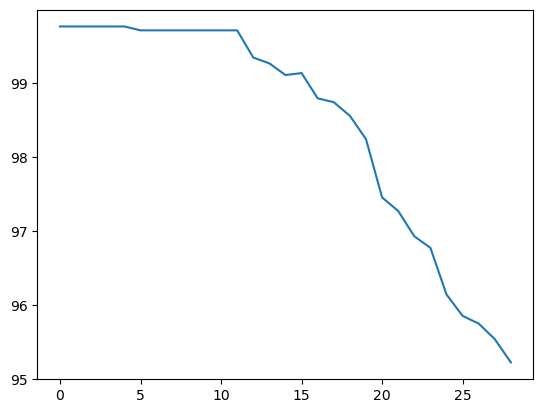

In [186]:
p=plt.plot(lst)

# Navie bayes

In [187]:
nb.fit(x1_tr,y1_tr)

MultinomialNB()

In [188]:
nb_p1=nb.predict(x1_te)

In [189]:
nb_m1=confusion_matrix(nb_p1,y1_te)
nb_m1

array([[1121,  748],
       [ 842, 1102]], dtype=int64)

In [190]:
tpr15=1142/(1142+821)
tpr15

0.5817626082526745

In [191]:
fpr15=734/(734+1116)
fpr15

0.39675675675675676

In [192]:
recall15=1142/(1142+821)
recall15

0.5817626082526745

In [193]:
precision15=1142/(1142+734)
precision15

0.6087420042643923

In [194]:
f1_score15=(2*(precision15*recall15))/(precision15+recall15)
f1_score15

0.5949466006772598

In [195]:
nb_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

58.300550747442955

In [196]:
print(classification_report(nb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.57      0.60      0.59      1869
           1       0.60      0.57      0.58      1944

    accuracy                           0.58      3813
   macro avg       0.58      0.58      0.58      3813
weighted avg       0.58      0.58      0.58      3813



# SVM

In [197]:
svc.fit(x1_tr,y1_tr)

SVC()

In [198]:
svc_p1=svc.predict(x1_te)

In [199]:
svc_m1=confusion_matrix(svc_p1,y1_te)
svc_m1

array([[1476,  511],
       [ 487, 1339]], dtype=int64)

In [200]:
tpr16=1492/(1492+471)
tpr16

0.7600611309220581

In [201]:
fpr16=534/(534+1316)
fpr16

0.28864864864864864

In [202]:
recall16=1492/(1492+471)
recall16

0.7600611309220581

In [203]:
precision16=1492/(1492+534)
precision16

0.736426456071076

In [204]:
f1_score16=(2*(precision16*recall16))/(precision16+recall16)
f1_score16

0.7480571571822511

In [205]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

73.82638342512458

In [206]:
print(classification_report(svc_p1,y1_te))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1987
           1       0.72      0.73      0.73      1826

    accuracy                           0.74      3813
   macro avg       0.74      0.74      0.74      3813
weighted avg       0.74      0.74      0.74      3813



# Adaboost

In [207]:
adbo.fit(x1_tr,y1_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [208]:
adbo_p1=adbo.predict(x1_te)

In [209]:
adbo_m1=confusion_matrix(adbo_p1,y1_te)
adbo_m1

array([[1956,    2],
       [   7, 1848]], dtype=int64)

In [210]:
tpr17=1953/(1953+10)
tpr17

0.9949057564951604

In [211]:
fpr17=0/(0+1850)
fpr17

0.0

In [212]:
recall17=1953/(1953+10)
recall17

0.9949057564951604

In [213]:
precision17=1953/(1953+0)
precision17

1.0

In [214]:
f1_score17=(2*(precision17*recall17))/(precision17+recall17)
f1_score17

0.9974463738508682

In [215]:
adbo_acc1=adbo_m1.diagonal().sum()/adbo_m1.sum()*100
adbo_acc1

99.7639653815893

In [216]:
print(classification_report(adbo_p1,y1_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1958
           1       1.00      1.00      1.00      1855

    accuracy                           1.00      3813
   macro avg       1.00      1.00      1.00      3813
weighted avg       1.00      1.00      1.00      3813



# xgboost

In [217]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [218]:
xgb_p1=xgb.predict(x1_te)

In [219]:
xgb_m1=confusion_matrix(xgb_p1,y1_te)
xgb_m1

array([[1956,    2],
       [   7, 1848]], dtype=int64)

In [220]:
tpr18=1953/(1953+10)
tpr18

0.9949057564951604

In [221]:
fpr18=0/(0+1850)
fpr18

0.0

In [222]:
recall18=1953/(1953+10)
recall18

0.9949057564951604

In [223]:
precision18=1953/(1953+0)
precision18

1.0

In [224]:
f1_score18=(2*(precision18*recall18))/(precision18+recall18)
f1_score18

0.9974463738508682

In [225]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

99.7639653815893

In [226]:
print(classification_report(xgb_p1,y1_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1958
           1       1.00      1.00      1.00      1855

    accuracy                           1.00      3813
   macro avg       1.00      1.00      1.00      3813
weighted avg       1.00      1.00      1.00      3813



In [227]:
l11=["LG","DT","RF","SVM","KNN","NB","AdaBoost","xgBoost"]
l22=[lg_acc1,dt_acc1,rf_acc1,svc_acc1,knn_acc1,nb_acc1,adbo_acc1,xgb_acc1]
l33=[tpr11,tpr12,tpr13,tpr14,tpr15,tpr16,tpr17,tpr18]
l44=[fpr11,fpr12,fpr13,fpr14,fpr15,fpr16,fpr17,fpr18]
l55=[f1_score11,f1_score12,f1_score13,f1_score14,f1_score15,f1_score16,f1_score17,f1_score18]

In [228]:
d2=pd.DataFrame({"Model Name":l11,"accuracy":l22,"TPR":l33,"FPR":l44,"f1_score":l55})
d2

,Model Name,accuracy,TPR,FPR,f1_score
0,LG,62.942565,0.573612,0.303243,0.616986
1,DT,99.763965,0.997962,0.001081,0.998471
2,RF,99.763965,0.997962,0.001081,0.998471
3,SVM,73.826383,0.936831,0.035135,0.951125
4,KNN,96.144768,0.581763,0.396757,0.594947
5,NB,58.300551,0.760061,0.288649,0.748057
6,AdaBoost,99.763965,0.994906,0.000000,0.997446
7,xgBoost,99.763965,0.994906,0.000000,0.997446


In [229]:
precision_2,recall_2,threshold_2=precision_recall_curve(y1_te,rf_pre1)

<function matplotlib.pyplot.show(close=None, block=None)>

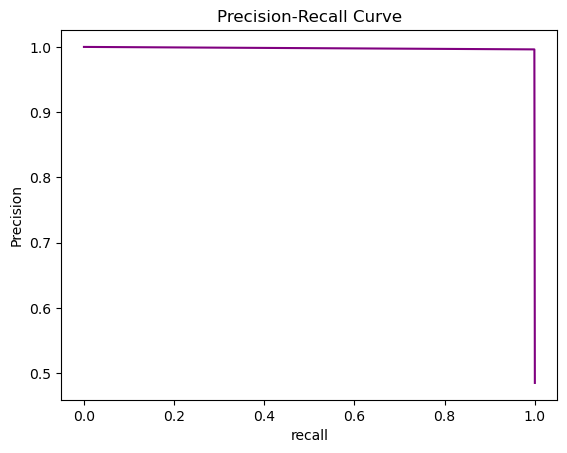

In [329]:
fig,ax=plt.subplots()
ax.plot(recall_2,precision_2,color="purple")
plt.title("Precision-Recall Curve")
plt.xlabel("recall")
plt.ylabel("Precision")
plt.show

# Feature Selection

# RFE Method

In [231]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier()

In [232]:
rfe=RFE(dTree)

In [233]:
rfe.fit(class0_1.iloc[:,2:-1],class0_1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [234]:
rfe.support_

array([False,  True, False])

In [235]:
rfe_df=pd.DataFrame({"Importances":list(rfe.support_),"Columns":list(class0_1.iloc[:,2:-1].columns)})
rfe_df

,Importances,Columns
0,False,Sex
1,True,Disease
2,False,Treatment


In [236]:
sorted_df =rfe_df.sort_values(["Importances"],ascending=False)
sorted_df

,Importances,Columns
1,True,Disease
0,False,Sex
2,False,Treatment


In [237]:
d_1=data.drop(["Sex","Treatment"],axis=1)
d_1

,Symptoms,Age,Disease,Nature
0,1,5.0,3,0
1,83,4.0,3,0
2,5,6.0,3,0
3,4,7.0,3,0
4,4,9.0,3,0
...,...,...,...,...
25242,80,5.0,6,0
25243,80,12.0,6,0
25244,80,78.0,6,0
25245,80,76.0,6,0


In [238]:
x2=d_1.iloc[:,:-1]
y2=d_1.iloc[:,-1]

In [239]:
x2.head(1)

,Symptoms,Age,Disease
0,1,5.0,3


In [240]:
y2.head(1)

0    0
Name: Nature, dtype: int32

In [241]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [242]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((20197, 3), (5050, 3), (20197,), (5050,))

# Logistic Regression

In [243]:
lg.fit(x2_tr,y2_tr)

LogisticRegression()

In [244]:
lg_p3=lg.predict(x2_te)
lg_p3

array([0, 0, 0, ..., 0, 0, 0])

In [245]:
lg_m3=confusion_matrix(lg_p3,y2_te)
lg_m3

array([[3160, 1890],
       [   0,    0]], dtype=int64)

In [246]:
tpr21=3160/(3160+0)
tpr21

1.0

In [247]:
fpr21=1890/(1890+0)
fpr21

1.0

In [248]:
recall21=3160/(3160+0)
recall21

1.0

In [249]:
precision21=3160/(3160+1890)
precision21

0.6257425742574257

In [250]:
f21_score21=(2*(precision21*recall21))/(recall21+precision21)
f21_score21

0.7697929354445797

In [251]:
lg_acc3=lg_m3.diagonal().sum()/lg_m3.sum()*100
lg_acc3

62.57425742574257

In [252]:
print(classification_report(lg_p3,y2_te))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      5050
           1       0.00      0.00      0.00         0

    accuracy                           0.63      5050
   macro avg       0.50      0.31      0.38      5050
weighted avg       1.00      0.63      0.77      5050



# Decision Tree

In [253]:
dt.fit(x2_tr,y2_tr)

DecisionTreeClassifier()

In [254]:
dt_p3=dt.predict(x2_te)
dt_p3

array([1, 0, 0, ..., 1, 1, 0])

In [255]:
dt_m3=confusion_matrix(dt_p3,y2_te)
dt_m3

array([[3123,   18],
       [  37, 1872]], dtype=int64)

In [256]:
tpr22=3123/(3123+37)
tpr22

0.9882911392405064

In [257]:
fpr22=18/(18+1872)
fpr22

0.009523809523809525

In [258]:
recall22=3123/(3123+37)
recall22

0.9882911392405064

In [259]:
precision22=3123/(3123+18)
precision22

0.994269340974212

In [260]:
f2_1_score21=(2*(precision22*recall22))/(precision22+recall22)
f2_1_score21

0.9912712267893985

In [261]:
dt_acc3=dt_m3.diagonal().sum()/dt_m3.sum()*100
dt_acc3

98.91089108910892

In [262]:
print(classification_report(dt_p3,y2_te))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3141
           1       0.99      0.98      0.99      1909

    accuracy                           0.99      5050
   macro avg       0.99      0.99      0.99      5050
weighted avg       0.99      0.99      0.99      5050



# Random Forest

In [263]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [264]:
rf_pre3=rf.predict(x2_te)
rf_pre3

array([1, 0, 0, ..., 1, 1, 0])

In [265]:
rf_mat3=confusion_matrix(rf_pre3,y2_te)
rf_mat3

array([[3123,   18],
       [  37, 1872]], dtype=int64)

In [266]:
tpr23=3123/(3123+37)
tpr23

0.9882911392405064

In [267]:
fpr23=18/(18+1872)
fpr23

0.009523809523809525

In [268]:
recall23=3123/(3123+37)
recall23

0.9882911392405064

In [269]:
precision23=3123/(3123+18)
precision23

0.994269340974212

In [270]:
f2_1_score23=(2*(recall23*precision23))/(precision23+recall23)
f2_1_score23

0.9912712267893985

In [271]:
rf_acc3=rf_mat3.diagonal().sum()/rf_mat3.sum()*100
rf_acc3

98.91089108910892

In [272]:
print(classification_report (rf_pre3,y2_te))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3141
           1       0.99      0.98      0.99      1909

    accuracy                           0.99      5050
   macro avg       0.99      0.99      0.99      5050
weighted avg       0.99      0.99      0.99      5050



# Navie Bayes

In [273]:
nb.fit(x2_tr,y2_tr)

MultinomialNB()

In [274]:
nb_p3=nb.predict(x2_te)

In [275]:
nb_m3=confusion_matrix(nb_p3,y2_te)
nb_m3

array([[1792,  757],
       [1368, 1133]], dtype=int64)

In [276]:
tpr24=1792/(1792+1368)
tpr24

0.5670886075949367

In [277]:
fpr24=757/(757+1133)
fpr24

0.4005291005291005

In [278]:
recall24=1792/(1792+1368)
recall24

0.5670886075949367

In [279]:
precision24=1792/(1792+757)
precision24

0.7030207924676344

In [280]:
f2_1_score24=(2*(precision24*recall24))/(recall24+precision24)
f2_1_score24

0.627780697144859

In [281]:
nb_acc3=nb_m3.diagonal().sum()/nb_m3.sum()*100
nb_acc3

57.920792079207914

In [282]:
print(classification_report(nb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63      2549
           1       0.60      0.45      0.52      2501

    accuracy                           0.58      5050
   macro avg       0.58      0.58      0.57      5050
weighted avg       0.58      0.58      0.57      5050



# SVM

In [283]:
svc.fit(x2_tr,y2_tr)

SVC()

In [284]:
svc_p3=svc.predict(x2_te)

In [285]:
svc_m3=confusion_matrix(svc_p3,y2_te)
svc_m3

array([[2954, 1417],
       [ 206,  473]], dtype=int64)

In [286]:
tpr25=2954/(2954+206)
tpr25

0.9348101265822785

In [287]:
fpr25=1417/(1417+473)
fpr25

0.7497354497354497

In [288]:
recall25=2954/(2954+206)
recall25

0.9348101265822785

In [289]:
precision25=2954/(2954+1417)
precision25

0.6758178906428735

In [290]:
f2_1_score25=(2*(precision25*recall25))/(precision25+recall25)
f2_1_score25

0.7844907714778914

In [291]:
svc_acc3=svc_m3.diagonal().sum()/svc_m3.sum()*100
svc_acc3

67.86138613861387

In [292]:
print(classification_report(svc_p3,y2_te))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78      4371
           1       0.25      0.70      0.37       679

    accuracy                           0.68      5050
   macro avg       0.59      0.69      0.58      5050
weighted avg       0.84      0.68      0.73      5050



# KNN

In [293]:
knn.fit(x2_tr,y2_tr)

KNeighborsClassifier(n_neighbors=29)

In [294]:
knn_p3=knn.predict(x2_te)

In [295]:
knn_m3=confusion_matrix(knn_p3,y2_te)
knn_m3

array([[3122,   99],
       [  38, 1791]], dtype=int64)

In [296]:
tpr26=3122/(3122+38)
tpr26

0.9879746835443038

In [297]:
fpr26=99/(99+1791)
fpr26

0.05238095238095238

In [298]:
recall26=3122/(3122+38)
recall26

0.9879746835443038

In [299]:
precision26=3122/(3122+99)
precision26

0.9692642036634586

In [300]:
f2_1_score26=(2*(precision26*recall26))/(recall26+precision26)
f2_1_score26

0.9785300109700674

In [301]:
knn_acc3=knn_m3.diagonal().sum()/knn_m3.sum()*100
knn_acc3

97.28712871287128

In [302]:
print(classification_report(knn_p3,y2_te))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3221
           1       0.95      0.98      0.96      1829

    accuracy                           0.97      5050
   macro avg       0.97      0.97      0.97      5050
weighted avg       0.97      0.97      0.97      5050



# adaboost

In [303]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [304]:
adbo.fit(x2_tr,y2_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [305]:
adbo_p3=adbo.predict(x2_te)

In [306]:
adboo_m3=confusion_matrix(adbo_p3,y2_te)
adboo_m3

array([[3123,   18],
       [  37, 1872]], dtype=int64)

In [307]:
tpr27=3123/(3123+37)
tpr27

0.9882911392405064

In [308]:
fpr27=18/(18+1872)
fpr27

0.009523809523809525

In [309]:
recall27=3123/(3123+37)
recall27

0.9882911392405064

In [310]:
precision27=3123/(3123+18)
precision27

0.994269340974212

In [311]:
f2_1_score27=(2*(precision27*recall27))/(recall27+precision27)
f2_1_score27

0.9912712267893985

In [312]:
adbo_acc3=adboo_m3.diagonal().sum()/adboo_m3.sum()*100
adbo_acc3

98.91089108910892

In [313]:
print(classification_report(adbo_p3,y2_te))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3141
           1       0.99      0.98      0.99      1909

    accuracy                           0.99      5050
   macro avg       0.99      0.99      0.99      5050
weighted avg       0.99      0.99      0.99      5050



# xgboost

In [314]:
xgb.fit(x2_tr,y2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [315]:
xgb_p3=xgb.predict(x2_te)

In [316]:
xgb_m3=confusion_matrix(xgb_p3,y2_te)
xgb_m3

array([[3123,   18],
       [  37, 1872]], dtype=int64)

In [317]:
tpr28=3123/(3123+37)
tpr28

0.9882911392405064

In [318]:
fpr28=18/(18+1872)
fpr28

0.009523809523809525

In [319]:
recall28=3123/(3123+37)
recall28

0.9882911392405064

In [320]:
precision28=3123/(3123+18)
precision28

0.994269340974212

In [321]:
f2_1_score28=(2*(recall28*precision28))/(recall28+precision28)
f2_1_score28

0.9912712267893985

In [322]:
xgb_acc3=xgb_m3.diagonal().sum()/xgb_m3.sum()*100
xgb_acc3

98.91089108910892

In [323]:
print(classification_report(xgb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3141
           1       0.99      0.98      0.99      1909

    accuracy                           0.99      5050
   macro avg       0.99      0.99      0.99      5050
weighted avg       0.99      0.99      0.99      5050



In [324]:
l21=["log","dt","rf","nb","svm","knn","adaboost","xgboost"]
l22=[lg_acc3,dt_acc3,rf_acc3,nb_acc3,svc_acc3,knn_acc3,adbo_acc3,xgb_acc3]
l23=[tpr21,tpr22,tpr23,tpr24,tpr25,tpr26,tpr27,tpr28]
l24=[fpr21,fpr22,fpr23,fpr24,fpr25,fpr26,fpr27,fpr28]
l25=[f21_score21,f2_1_score21,f2_1_score23,f2_1_score24,f2_1_score25,f2_1_score26,f2_1_score27,f2_1_score28]

In [325]:
d3=pd.DataFrame({"Model_Name":l21,"accuracy":l22,"TPR":l23,"FPR":l24,"f1score":l25})
d3

,Model_Name,accuracy,TPR,FPR,f1score
0,log,62.574257,1.000000,1.000000,0.769793
1,dt,98.910891,0.988291,0.009524,0.991271
2,rf,98.910891,0.988291,0.009524,0.991271
3,nb,57.920792,0.567089,0.400529,0.627781
4,svm,67.861386,0.934810,0.749735,0.784491
5,knn,97.287129,0.987975,0.052381,0.978530
6,adaboost,98.910891,0.988291,0.009524,0.991271
7,xgboost,98.910891,0.988291,0.009524,0.991271


In [326]:
precision_3,recall_3,threshold_3=precision_recall_curve(y2_te,rf_pre3)

<function matplotlib.pyplot.show(close=None, block=None)>

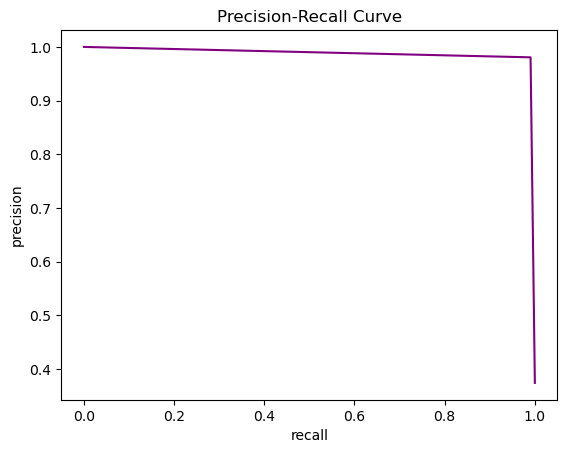

In [330]:
fig,ax=plt.subplots()
ax.plot(recall_3,precision_3,color="purple")
plt.title("Precision-Recall Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show